In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import tensorflow as tf
from keras import datasets, utils, layers, Sequential
from keras.callbacks import TensorBoard

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

print(f"train image shape={train_images.shape}, test image shape={test_images.shape}")
print(f"train label shape={train_labels.shape}, test label shape={test_labels.shape}")
# print(matplotlib.get_backend())

flatten = 28 * 28
TRAINING_SIZE = len(train_images)
TEST_SIZE = len(test_images)
# print(TRAINING_SIZE, TEST_SIZE)
trainImages = np.reshape(train_images, (TRAINING_SIZE, flatten))
testImages = np.reshape(test_images, (TEST_SIZE, flatten))
print(f"after flatten, train image shape={trainImages.shape}, test image shape={testImages.shape}")

# convert to float
trainImages = trainImages.astype(np.float32)
testImages = testImages.astype(np.float32)
# print(trainImages[0])
trainImages /= 255
testImages /= 255
# print(trainImages[0])

NUM_DIGITS = len(np.unique(train_labels))
print(f'NUM_DIGITS={NUM_DIGITS}')
trainLabels = utils.to_categorical(train_labels, NUM_DIGITS)
testILabels = utils.to_categorical(test_labels, NUM_DIGITS)
model = Sequential()
model.add(layers.Dense(256, activation=tf.nn.relu, input_shape=(flatten,)))
model.add(layers.Dense(64, activation=tf.nn.relu))
model.add(layers.Dense(10, activation=tf.nn.softmax))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

# tbCallback = TensorBoard(log_dir='log', histogram_freq=True,
#                          write_graph=True, write_images=True)

# history = model.fit(trainImages, trainLabels, epochs=20, callbacks=[tbCallback])
history = model.fit(trainImages, trainLabels, epochs=20)

Using TensorFlow backend.


train image shape=(60000, 28, 28), test image shape=(10000, 28, 28)
train label shape=(60000,), test label shape=(10000,)
after flatten, train image shape=(60000, 784), test image shape=(10000, 784)
NUM_DIGITS=10
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.2138 - accuracy: 0.9351
Epoch 2/20
60000/60000 [==============================] - 5s

In [21]:
predictLabels = model.predict(testImages)
print(f"test marker as: {testILabels[:1]}")
print(f"predict as: {predictLabels[:1]}")
predictLabels = model.predict_classes(testImages)
print(f"predict_class as: {predictLabels[:1]}")

test marker as: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
predict as: [[3.2826291e-37 7.7021170e-32 4.5811334e-29 5.6688303e-20 4.3699634e-37
  2.3463597e-34 0.0000000e+00 1.0000000e+00 3.8543943e-35 1.9810440e-23]]
predict_class as: [7]


In [4]:
loss, accuracy = model.evaluate(testImages, testILabels)
print(f'test loss={loss}, test accuracy={accuracy}')

10000/10000 [==============================] - 0s 30us/step
test loss=0.24037980792220295, test accuracy=0.9779000282287598


In [12]:
def plotTestImage(index):
    plt.title(f"test image marked as {test_labels[index]}")
    plt.imshow(test_images[index], cmap='binary')

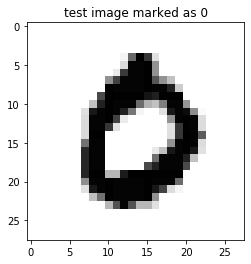

In [14]:
plotTestImage(3)

In [15]:
import pandas as pd

In [23]:
pd.crosstab(test_labels, predictLabels, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,1,0,1,0,1,1,1,4,0
1,0,1116,3,3,0,0,1,1,11,0
2,3,0,1008,7,1,0,1,2,10,0
3,0,0,3,993,0,2,0,3,7,2
4,1,0,4,1,956,0,5,2,4,9
5,3,0,0,14,1,860,4,0,9,1
6,3,3,1,1,3,2,938,0,7,0
7,2,2,10,3,0,0,0,988,12,11
8,0,1,1,6,0,0,1,1,961,3


In [25]:
crosstab2 = pd.DataFrame({'label':test_labels, 'predict':predictLabels})
crosstab2

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


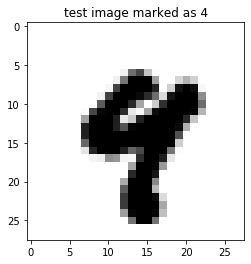

In [26]:
plotTestImage(2130)

In [ ]:
for index in result